In [2]:
import xarray as xr
import numpy as np
from xmitgcm import open_mdsdataset
from xgcm import Grid
from os.path import join as pjoin
%matplotlib inline

In [3]:
ddir = '/rigel/ocp/users/jb3210/projects/aviso_surface_tracer/runs'

run = 'run_KOC_PSI_variance_budget'
rundir = pjoin(ddir,run)
timestep = 900 # in seconds
readin_dict = dict(delta_t=timestep, swap_dims=False)
ds_mean = open_mdsdataset(rundir,prefix=['tracer_diags'], **readin_dict)
ds_mean

/rigel/home/jb3210/src/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/rigel/home/jb3210/src/xmitgcm/xmitgcm/mds_store.py:220: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (i: 3600, i_g: 3600, j: 1600, j_g: 1600, k: 1, k_l: 1, k_p1: 2, k_u: 1, time: 292)
Coordinates:
  * i         (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j         (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k         (k) int64 0
  * k_u       (k_u) int64 0
  * k_l       (k_l) int64 0
  * k_p1      (k_p1) int64 0 1
    XC        (j, i) >f4 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    YC        (j, i) >f4 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    XG        (j_g, i_g) >f4 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    YG        (j_g, i_g) >f4 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    Z         (k) >f4 dask.array<shape=(1,), chunksize=(1,)>
    Zp1       (k_p1) >f4 dask.array<shape=(2,), c

In [9]:
test_tracer = ds_mean.i**2+ds_mean.j**2
test_tracer

<xarray.DataArray (i: 3600, j: 1600)>
array([[       0,        1,        4, ...,  2550409,  2553604,  2556801],
       [       1,        2,        5, ...,  2550410,  2553605,  2556802],
       [       4,        5,        8, ...,  2550413,  2553608,  2556805],
       ..., 
       [12938409, 12938410, 12938413, ..., 15488818, 15492013, 15495210],
       [12945604, 12945605, 12945608, ..., 15496013, 15499208, 15502405],
       [12952801, 12952802, 12952805, ..., 15503210, 15506405, 15509602]])
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...

In [13]:
ds_mean['rA'].isel(j=800,i=1800).compute()

<xarray.DataArray 'rA' ()>
array(123604240.0, dtype=float32)
Coordinates:
    i        int64 1800
    j        int64 800
    XC       float32 180.05
    YC       float32 0.05
    rA       float32 1.23604e+08
    Depth    float32 100.0
    hFacC    float32 1.0
Attributes:
    standard_name:  cell_area
    long_name:      cell area
    units:          m2
    coordinate:     YC XC

In [16]:
ds_m.UVEL

AttributeError: 'Dataset' object has no attribute 'UVEL'

In [9]:
ds_mean.DYSqTr01

<xarray.DataArray 'DYSqTr01' (time: 292, j_g: 1600, i: 3600)>
dask.array<shape=(292, 1600, 3600), dtype=float32, chunksize=(1, 1600, 3600)>
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
    dxG      (j_g, i) >f4 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    dyC      (j_g, i) >f4 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    rAs      (j_g, i) >f4 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    hFacS    (j_g, i) >f4 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    iter     (time) int64 dask.array<shape=(292,), chunksize=(1,)>
  * time     (time) int64 2592000 5184000 7776000 10368000 12960000 15552000 ...
Attributes:
    standard_name:  DYSqTr01
    long_name:      TR1 meridional gradient squared
    units:          kg/kg  ^2 / m^2

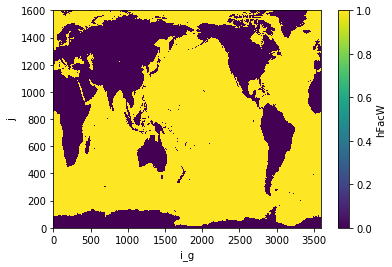

In [14]:
ds_mean.hFacW.plot()